**Import Required Libraries**

In [ ]:
!pip install roboflow
!pip install ultralytics==8.0.196

**Load Dataset**

In [6]:
from roboflow import Roboflow
rf = Roboflow(api_key="lWjBywj3M1I4YI09jTmu")
project = rf.workspace("road-crack-project").project("road-crack-detection-combined-dataset")
version = project.version(2)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Road-Crack-Detection-Combined-Dataset-2 in yolov5pytorch:: 100%|██████████| 3510/3510 [00:01<00:00, 2947.82it/s]


**Create Yolo RT-DETR Object Detection Model**

In [4]:
from ultralytics import RTDETR

In [5]:
# Load a model
model = RTDETR("rtdetr-l.pt")

100%|██████████| 63.4M/63.4M [00:01<00:00, 66.5MB/s]


**Train the Yolo RT-DETR Model on Road Crack Dataset**

In [7]:
# train the model
results = model.train(data = '/content/Road-Crack-Detection-Combined-Dataset-2/data.yaml', epochs = 50)

New https://pypi.org/project/ultralytics/8.2.18 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=rtdetr-l.pt, data=/content/Road-Crack-Detection-Combined-Dataset-2/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, vi

**Training Results**

In [8]:
import pandas as pd

train_results = pd.read_csv("/content/runs/detect/train/results.csv")
train_results.tail()

,epoch,train/giou_loss,train/cls_loss,train/l1_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/giou_loss,val/cls_loss,val/l1_loss,lr/pg0,lr/pg1,lr/pg2
45,46,0.46523,0.56411,0.22371,0.56895,0.53775,0.53023,0.27268,0.61052,0.68781,0.36569,0.000161,0.000161,0.000161
46,47,0.45027,0.55417,0.21891,0.64518,0.58255,0.55977,0.28958,0.61331,0.70603,0.3624,0.000136,0.000136,0.000136
47,48,0.45073,0.52921,0.21479,0.62239,0.57357,0.55342,0.28598,0.60944,0.71332,0.37232,0.000111,0.000111,0.000111
48,49,0.44539,0.53118,0.20941,0.63124,0.58570,0.56792,0.29871,0.61118,0.68509,0.37577,0.000087,0.000087,0.000087
49,50,0.45517,0.51696,0.22323,0.66762,0.57785,0.57149,0.30015,0.60522,0.68084,0.3726,0.000062,0.000062,0.000062


(-0.5, 2399.5, 1199.5, -0.5)

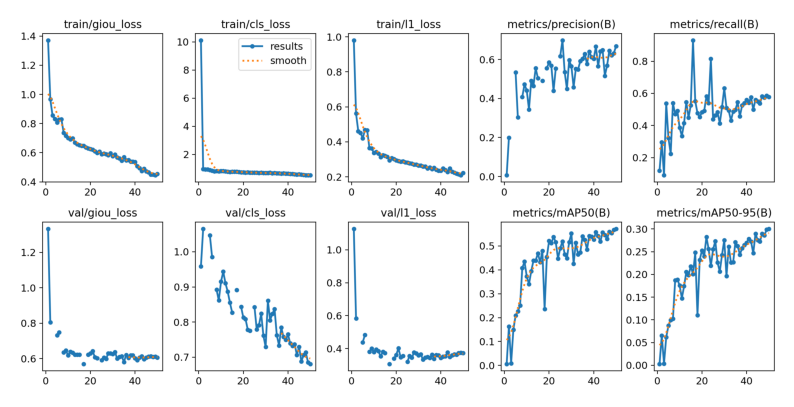

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
train_res = plt.imread("/content/runs/detect/train/results.png")
plt.imshow(train_res)
plt.axis("off")

**R_curve**

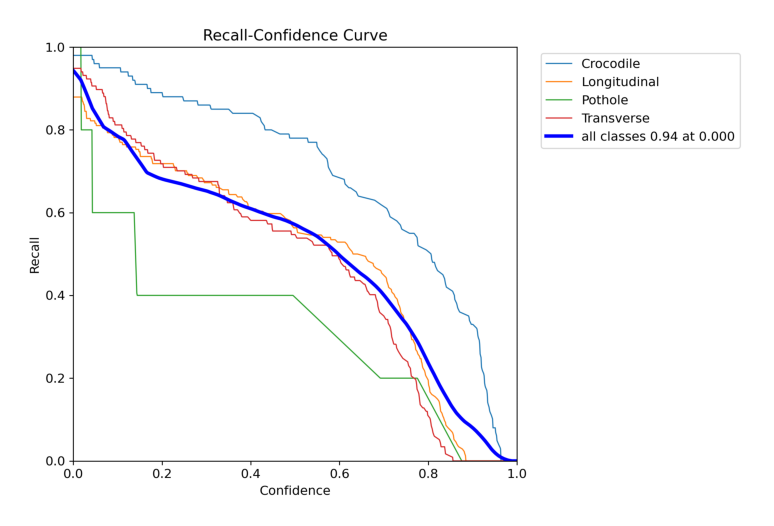

In [10]:
import matplotlib.pyplot as plt

# Load the image
r_curve = plt.imread("/content/runs/detect/train/R_curve.png")

# Create a figure with a higher DPI
fig, ax = plt.subplots(dpi=150)

# Display the image
ax.imshow(r_curve)
ax.axis("off")

# Show the plot
plt.show()

**P-Curve**

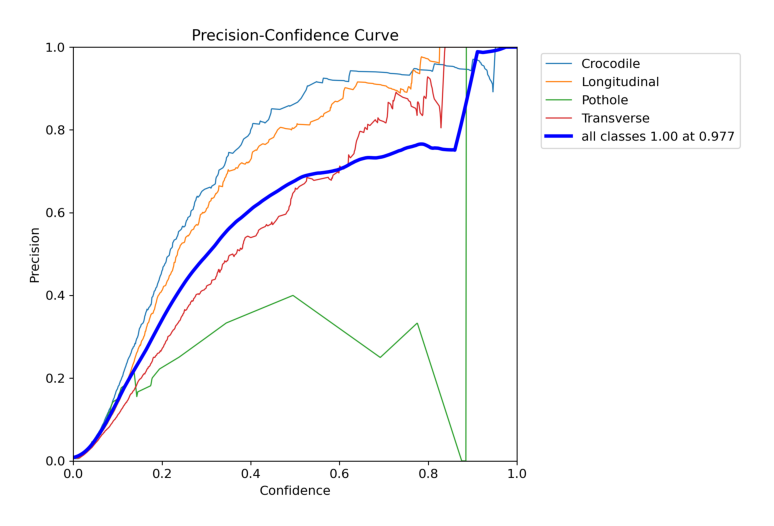

In [11]:
import matplotlib.pyplot as plt

# Load the image
r_curve = plt.imread("/content/runs/detect/train/P_curve.png")

# Create a figure with a higher DPI
fig, ax = plt.subplots(dpi=150)

# Display the image
ax.imshow(r_curve)
ax.axis("off")

# Show the plot
plt.show()

**PR_curve**

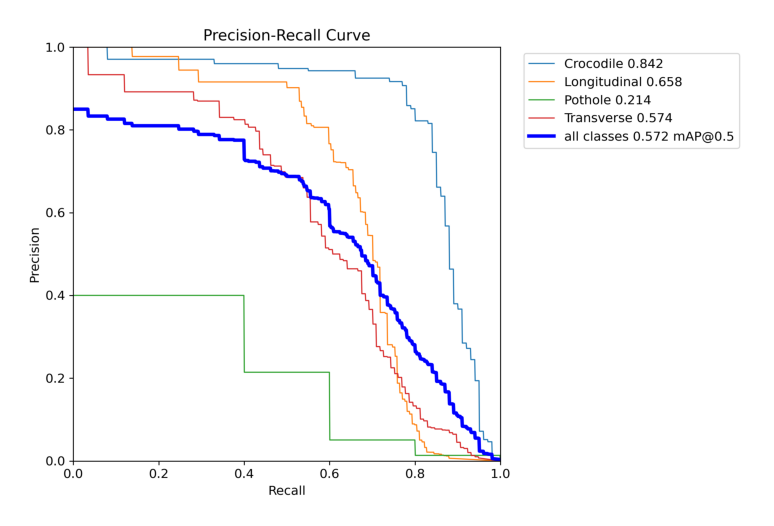

In [12]:
import matplotlib.pyplot as plt

# Load the image
r_curve = plt.imread("/content/runs/detect/train/PR_curve.png")

# Create a figure with a higher DPI
fig, ax = plt.subplots(dpi=150)

# Display the image
ax.imshow(r_curve)
ax.axis("off")

# Show the plot
plt.show()

**F1_curve**

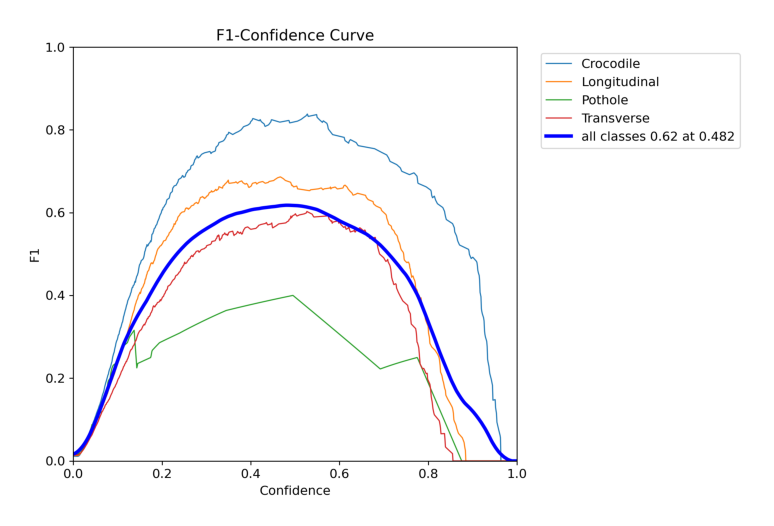

In [13]:
import matplotlib.pyplot as plt

# Load the image
r_curve = plt.imread("/content/runs/detect/train/F1_curve.png")

# Create a figure with a higher DPI
fig, ax = plt.subplots(dpi=150)

# Display the image
ax.imshow(r_curve)
ax.axis("off")

# Show the plot
plt.show()

**Confusion Matrix**

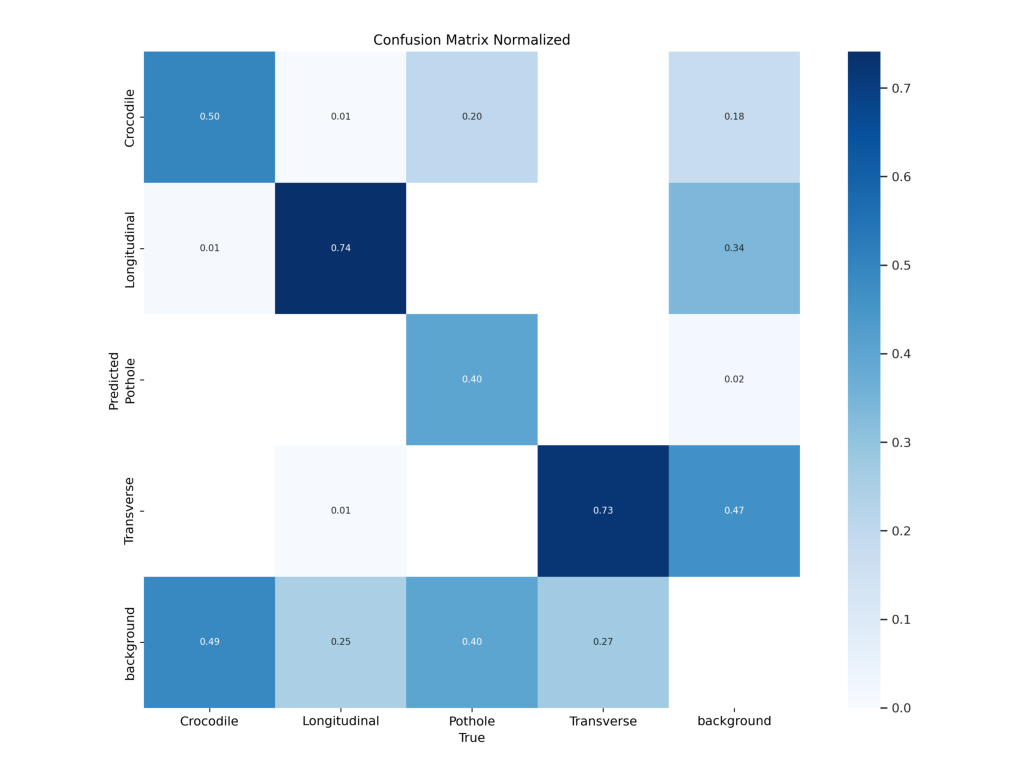

In [14]:
# Load the image
r_curve = plt.imread("/content/runs/detect/train/confusion_matrix_normalized.png")

# Create a figure with a higher DPI
fig, ax = plt.subplots(dpi=200)

# Display the image
ax.imshow(r_curve)
ax.axis("off")

# Show the plot
plt.show()

**Validate results the Yolo RT-DETR on Validation Dataset**

**R_curve**

In [15]:
model.val()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
rt-detr-l summary: 498 layers, 31991960 parameters, 0 gradients
val: Scanning /content/Road-Crack-Detection-Combined-Dataset-2/valid/labels.cache... 190 images, 0 backgrounds, 0 corrupt: 100%|██████████| 190/190 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:11<00:00,  1.05it/s]
                   all        190        396      0.676      0.579      0.574      0.302
             Crocodile        190        100      0.868       0.78      0.842      0.531
          Longitudinal        190        174      0.815       0.58      0.666      0.308
               Pothole        190          5      0.397        0.4      0.214      0.137
            Transverse        190        117      

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fbf0740d2d0>
fitness: 0.32879718386082984
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([     0.5312,     0.30765,     0.13661,      0.2307])
names: {0: 'Crocodile', 1: 'Longitudinal', 2: 'Pothole', 3: 'Transverse'}
plot: True
results_dict: {'metrics/precision(B)': 0.6758364536272498, 'metrics/recall(B)': 0.5790038314176245, 'metrics/mAP50(B)': 0.5741019201019436, 'metrics/mAP50-95(B)': 0.3015411020562616, 'fitness': 0.32879718386082984}
save_dir: PosixPath('runs/detect/val')
speed: {'preprocess': 0.6543322613364772, 'inference': 43.238575834977, 'loss': 0.0012447959498355264, 'postprocess': 1.4436646511680202}

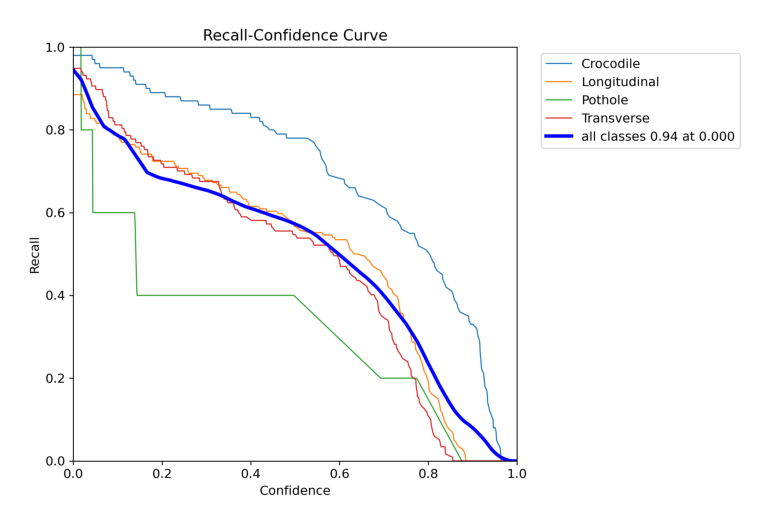

In [16]:
import matplotlib.pyplot as plt

# Load the image
r_curve = plt.imread("/content/runs/detect/val/R_curve.png")

# Create a figure with a higher DPI
fig, ax = plt.subplots(dpi=150)

# Display the image
ax.imshow(r_curve)
ax.axis("off")

# Show the plot
plt.show()

**P-Curve**

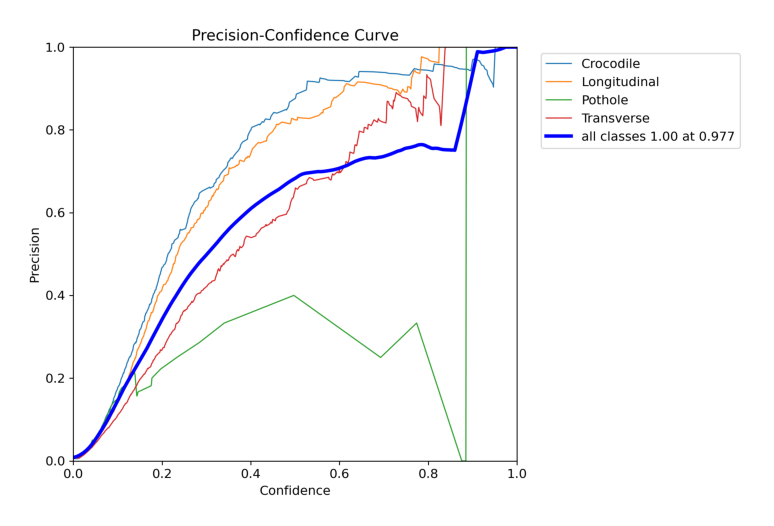

In [17]:
import matplotlib.pyplot as plt

# Load the image
r_curve = plt.imread("/content/runs/detect/val/P_curve.png")

# Create a figure with a higher DPI
fig, ax = plt.subplots(dpi=150)

# Display the image
ax.imshow(r_curve)
ax.axis("off")

# Show the plot
plt.show()

**PR_curve**

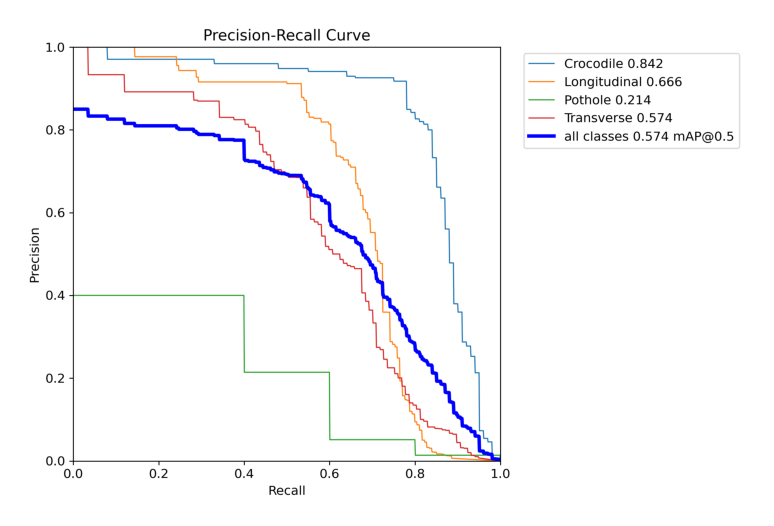

In [18]:
import matplotlib.pyplot as plt

# Load the image
r_curve = plt.imread("/content/runs/detect/val/PR_curve.png")

# Create a figure with a higher DPI
fig, ax = plt.subplots(dpi=150)

# Display the image
ax.imshow(r_curve)
ax.axis("off")

# Show the plot
plt.show()

**F1_curve**

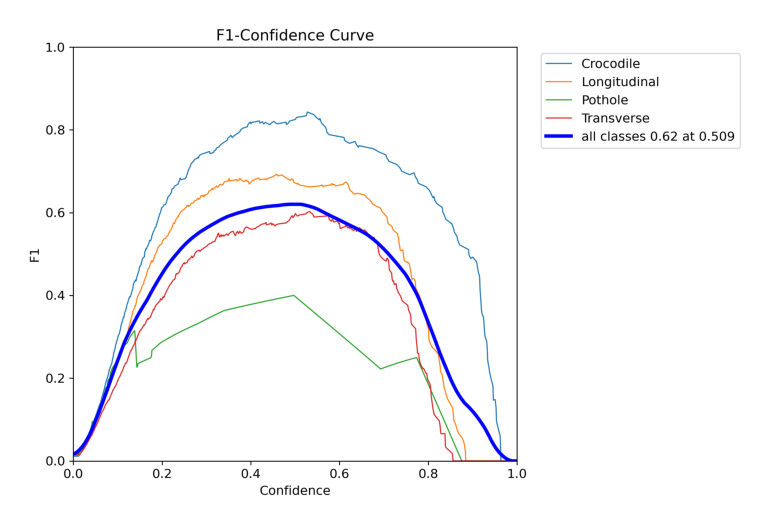

In [19]:
# Load the image
r_curve = plt.imread("/content/runs/detect/val/F1_curve.png")

# Create a figure with a higher DPI
fig, ax = plt.subplots(dpi=150)

# Display the image
ax.imshow(r_curve)
ax.axis("off")

# Show the plot
plt.show()

**Confusion Matrix**

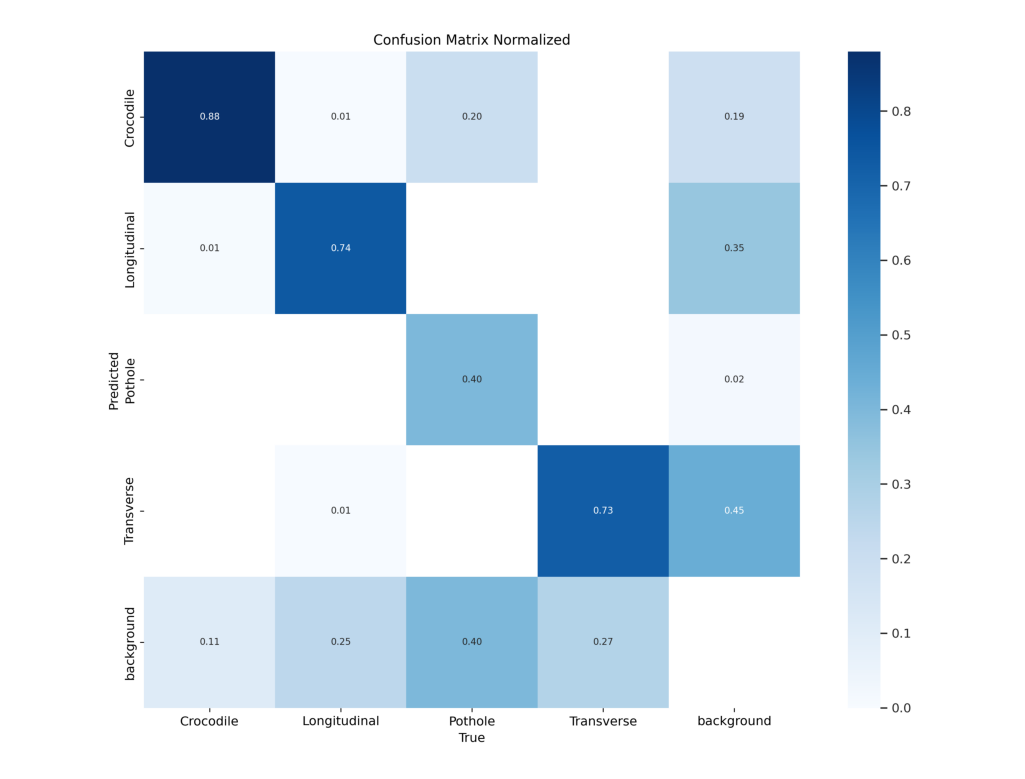

In [20]:
import matplotlib.pyplot as plt

# Load the image
r_curve = plt.imread("/content/runs/detect/val/confusion_matrix_normalized.png")

# Create a figure with a higher DPI
fig, ax = plt.subplots(dpi=200)

# Display the image
ax.imshow(r_curve)
ax.axis("off")

# Show the plot
plt.show()

**Visual Results**

In [21]:
import matplotlib.pyplot as plt

# Load the image
r_curve = plt.imread("/content/runs/detect/val/val_batch1_pred.jpg")

# Create a figure with a higher DPI
fig, ax = plt.subplots(dpi=300)

# Display the image
ax.imshow(r_curve)
ax.axis("off")

# Show the plot
plt.show()

Output hidden; open in https://colab.research.google.com to view.

**Test YOLO RT-DETR Model on Test images**

In [22]:
# Run evaluation on the test image set
test_results = model.predict(source="/content/Road-Crack-Detection-Combined-Dataset-2/test/images", save=True)


image 1/167 /content/Road-Crack-Detection-Combined-Dataset-2/test/images/frame1019---Copy_jpg.rf.97797afc733e95ac2025d1d368f58068.jpg: 640x640 1 Crocodile, 2 Longitudinals, 117.3ms
image 2/167 /content/Road-Crack-Detection-Combined-Dataset-2/test/images/frame1072---Copy_jpg.rf.f6fb519bb6de940f9a56f181b5325462.jpg: 640x640 2 Crocodiles, 3 Transverses, 61.7ms
image 3/167 /content/Road-Crack-Detection-Combined-Dataset-2/test/images/frame1131---Copy_jpg.rf.c3d5b11f5c4f82c71613b7e556c9356d.jpg: 640x640 (no detections), 61.1ms
image 4/167 /content/Road-Crack-Detection-Combined-Dataset-2/test/images/frame1171---Copy_jpg.rf.3dace60c37612ded87c6deb48a48cd94.jpg: 640x640 1 Crocodile, 61.2ms
image 5/167 /content/Road-Crack-Detection-Combined-Dataset-2/test/images/frame1209---Copy_jpg.rf.a905478d978f14ef1926272933a7fde6.jpg: 640x640 (no detections), 62.2ms
image 6/167 /content/Road-Crack-Detection-Combined-Dataset-2/test/images/frame1231---Copy_jpg.rf.cf0eb4f16f676994ea2cf77f49539d63.jpg: 640x640

In [23]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Directory containing images
image_dir = '/content/runs/detect/predict'

# Get a list of all files in the directory
all_files = os.listdir(image_dir)

# Filter out non-image files (optional, based on common image extensions)
image_files = [file for file in all_files if file.lower().endswith(('png', 'jpg', 'jpeg', 'gif', 'bmp', 'tiff'))]

# Randomly select 10 images
random_images = random.sample(image_files, 10)

# Create a figure
fig, axes = plt.subplots(2, 5, figsize=(25, 5))

# Flatten axes for easy iteration
axes = axes.flatten()

for ax, img_file in zip(axes, random_images):
    # Load image
    img_path = os.path.join(image_dir, img_file)
    img = Image.open(img_path)

    # Display image
    ax.imshow(img)
    #ax.set_title(img_file)
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.